# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `16_ald_diff_analysis`

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)

In [2]:
# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters

In [3]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [4]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "Median"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


In [5]:
params = vaep.nb.get_params(args, globals=globals())
params

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


{'folder_experiment': 'runs/alzheimer_study',
 'target': 'AD',
 'model_key': 'Median',
 'baseline': 'PI',
 'out_folder': 'diff_analysis',
 'disease_ontology': 10652,
 'annotaitons_gene_col': 'None'}

In [6]:
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args

root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'model_key': 'Median',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_Median'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'target': 'AD'}

In [7]:
files_in = {
    'freq_features_observed.csv': args.folder_experiment / 'freq_features_observed.csv',
}
files_in

{'freq_features_observed.csv': PosixPath('runs/alzheimer_study/freq_features_observed.csv')}

## Excel file for exports

In [8]:
files_out = dict()

In [9]:
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
fname

PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_Median/diff_analysis_compare_methods.xlsx')

## Load scores

In [10]:
[x for x in args.scores_folder.iterdir() if 'scores' in str(x)]

[PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_None.ipynb'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_None.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_PI.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_Median.ipynb'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_DAE.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_DAE.html'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_QRILC.html'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_QRILC.ipynb'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analysis_Median.html'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/diff_analysis_scores_QRILC.pkl'),
 PosixPath('runs/alzheimer_study/diff_analysis/AD/scores/10_1_ald_diff_analy

In [11]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.251  1  0.422 0.517 0.002   
                             age        0.266  1  0.447 0.505 0.002   
                             Kiel       2.486  1  4.170 0.043 0.021   
                             Magdeburg  4.941  1  8.289 0.004 0.042   
                             Sweden     8.159  1 13.687 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.792  1  0.801 0.372 0.004   
                             age        0.591  1  0.597 0.441 0.003   
                             Kiel       0.036  1  0.037 0.848 0.000   
                             Magdeburg  0.791  1  0.800 0.372 0.004   
                             Sweden    21.102  1 21.335 0.000 0.100   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.287  0.668    False  
                             age               0.297  0.658    False  
                             Kiel              1.371  0.106    False  
                             Magdeburg         2.352  0.017     True  
                             Sweden            3.549  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.429  0.537    False  
                             age               0.356  0.597    False  
                             Kiel              0.072  0.913    False  
                             Magdeburg         0.429  0.537    False  
                             Sweden            5.150  0.000     True  

[7105 rows x 8 columns]

In [12]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                  Median                       \
var                                        SS DF     F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD         0.830  1 6.377 0.012 0.032   
                             age        0.001  1 0.006 0.939 0.000   
                             Kiel       0.106  1 0.815 0.368 0.004   
                             Magdeburg  0.219  1 1.680 0.197 0.009   
                             Sweden     1.101  1 8.461 0.004 0.042   
...                                       ... ..   ...   ...   ...   
S4R3U6                       AD         0.051  1 0.119 0.730 0.001   
                             age        1.214  1 2.845 0.093 0.015   
                             Kiel       0.861  1 2.018 0.157 0.010   
                             Magdeburg  0.216  1 0.506 0.478 0.003   
                             Sweden     3.965  1 9.288 0.003 0.046   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.907  0.039     True  
                             age               0.027  0.966    False  
                             Kiel              0.435  0.532    False  
                             Magdeburg         0.707  0.343    False  
                             Sweden            2.392  0.016     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.136  0.829    False  
                             age               1.030  0.194    False  
                             Kiel              0.804  0.289    False  
                             Magdeburg         0.321  0.631    False  
                             Sweden            2.580  0.011     True  

[7105 rows x 8 columns]

In [13]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.251  1  0.422 0.517 0.002   
                             age        0.266  1  0.447 0.505 0.002   
                             Kiel       2.486  1  4.170 0.043 0.021   
                             Magdeburg  4.941  1  8.289 0.004 0.042   
                             Sweden     8.159  1 13.687 0.000 0.067   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.792  1  0.801 0.372 0.004   
                             age        0.591  1  0.597 0.441 0.003   
                             Kiel       0.036  1  0.037 0.848 0.000   
                             Magdeburg  0.791  1  0.800 0.372 0.004   
                             Sweden    21.102  1 21.335 0.000 0.100   

model                                                                Median  \
var                                    -Log10 pvalue qvalue rejected     SS   
protein groups               Source                                           
A0A024QZX5;A0A087X1N8;P35237 AD                0.287  0.668    False  0.830   
                             age               0.297  0.658    False  0.001   
                             Kiel              1.371  0.106    False  0.106   
                             Magdeburg         2.352  0.017     True  0.219   
                             Sweden            3.549  0.002     True  1.101   
...                                              ...    ...      ...    ...   
S4R3U6                       AD                0.429  0.537    False  0.051   
                             age               0.356  0.597    False  1.214   
                             Kiel              0.072  0.913    False  0.861   
                             Magdeburg         0.429  0.537    False  0.216   
                             Sweden            5.150  0.000     True  3.965   

model                                                                      \
var                                    DF     F p-unc   np2 -Log10 pvalue   
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD         1 6.377 0.012 0.032         1.907   
                             age        1 0.006 0.939 0.000         0.027   
                             Kiel       1 0.815 0.368 0.004         0.435   
                             Magdeburg  1 1.680 0.197 0.009         0.707   
                             Sweden     1 8.461 0.004 0.042         2.392   
...                                    ..   ...   ...   ...           ...   
S4R3U6                       AD         1 0.119 0.730 0.001         0.136   
                             age        1 2.845 0.093 0.015         1.030   
                             Kiel       1 2.018 0.157 0.010         0.804   
                             Magdeburg  1 0.506 0.478 0.003         0.321   
                             Sweden     1 9.288 0.003 0.046         2.580   

model                                                   
var                                    qvalue rejected  
protein groups               Source                     
A0A024QZX5;A0A087X1N8;P35237 AD         0.039     True  
                             age        0.966    False  
                             Kiel       0.532    False  
                             Magdeburg  0.343    False  
                             Sweden     0.016     True  
...                                       ...      ...  
S4R3U6                       AD         0.829    False  
                             age        0.194    False  
                             Kiel       0.289    False  
                             Magdeburg  0.631    False  
                             Sweden     0.011     True  

[7105 rows x 16 colu

In [14]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'Median': 'Median'}

In [15]:
scores.describe()

model        PI                                                        \
var          SS        DF         F     p-unc       np2 -Log10 pvalue   
count 7,105.000 7,105.000 7,105.000 7,105.000 7,105.000     7,105.000   
mean     10.298     1.000    12.412     0.261     0.043         2.478   
std      64.593     0.000    86.109     0.303     0.084         5.322   
min       0.000     1.000     0.000     0.000     0.000         0.000   
25%       0.315     1.000     0.526     0.004     0.003         0.329   
50%       1.589     1.000     2.403     0.123     0.012         0.911   
75%       5.940     1.000     8.619     0.469     0.043         2.428   
max   4,088.806     1.000 6,235.160     0.999     0.970       147.053   

model              Median                                          \
var      qvalue        SS        DF         F     p-unc       np2   
count 7,105.000 7,105.000 7,105.000 7,105.000 7,105.000 7,105.000   
mean      0.338     3.501     1.000    11.016     0.259     0.044   
std       0.331    11.597     0.000    29.071     0.303     0.080   
min       0.000     0.000     1.000     0.000     0.000     0.000   
25%       0.015     0.132     1.000     0.536     0.003     0.003   
50%       0.246     0.701     1.000     2.521     0.114     0.013   
75%       0.625     2.605     1.000     8.948     0.465     0.045   
max       0.999   414.785     1.000   559.992     1.000     0.746   

model                          
var   -Log10 pvalue    qvalue  
count     7,105.000 7,105.000  
mean          2.475     0.334  
std           4.536     0.332  
min           0.000     0.000  
25%           0.332     0.013  
50%           0.943     0.228  
75%           2.503     0.620  
max          57.961     1.000

In [16]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI           \
var                                                          SS DF     F   
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD     0.251  1 0.422   
A0A024R0T9;K7ER74;P02655                           AD     3.214  1 4.062   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     3.240  1 3.096   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.071  1 0.322   
A0A075B6H7                                         AD     5.589  1 1.391   
...                                                         ... ..   ...   
Q9Y6R7                                             AD     0.675  1 1.850   
Q9Y6X5                                             AD     2.891  1 3.322   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.973  1 3.028   
Q9Y6Y9                                             AD     1.606  1 1.771   
S4R3U6                                             AD     0.792  1 0.801   

model                                                                  \
var                                                       p-unc   np2   
protein groups                                     Source               
A0A024QZX5;A0A087X1N8;P35237                       AD     0.517 0.002   
A0A024R0T9;K7ER74;P02655                           AD     0.045 0.021   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.080 0.016   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.571 0.002   
A0A075B6H7                                         AD     0.240 0.007   
...                                                         ...   ...   
Q9Y6R7                                             AD     0.175 0.010   
Q9Y6X5                                             AD     0.070 0.017   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083 0.016   
Q9Y6Y9                                             AD     0.185 0.009   
S4R3U6                                             AD     0.372 0.004   

model                                                                    \
var                                                       -Log10 pvalue   
protein groups                                     Source                 
A0A024QZX5;A0A087X1N8;P35237                       AD             0.287   
A0A024R0T9;K7ER74;P02655                           AD             1.344   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD             1.097   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD             0.243   
A0A075B6H7                                         AD             0.620   
...                                                                 ...   
Q9Y6R7                                             AD             0.756   
Q9Y6X5                                             AD             1.155   
Q9Y6Y8;Q9Y6Y8-2                                    AD             1.079   
Q9Y6Y9                                             AD             0.733   
S4R3U6                                             AD             0.429   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.668    False   
A0A024R0T9;K7ER74;P02655                           AD      0.112    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.176    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.708    False   
A0A075B6H7                                         AD      0.396    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.318    False   
Q9Y6X5                                             AD      0.158    False   
Q9Y6Y8;Q9Y6Y8-

In [17]:
scores.describe()

model        PI                                                        \
var          SS        DF         F     p-unc       np2 -Log10 pvalue   
count 1,421.000 1,421.000 1,421.000 1,421.000 1,421.000     1,421.000   
mean      3.678     1.000     4.884     0.254     0.024         1.409   
std       6.317     0.000     7.747     0.292     0.032         1.652   
min       0.000     1.000     0.000     0.000     0.000         0.002   
25%       0.379     1.000     0.622     0.011     0.003         0.365   
50%       1.543     1.000     2.436     0.120     0.013         0.920   
75%       4.232     1.000     6.559     0.431     0.033         1.950   
max      69.228     1.000   144.831     0.996     0.431        24.465   

model              Median                                          \
var      qvalue        SS        DF         F     p-unc       np2   
count 1,421.000 1,421.000 1,421.000 1,421.000 1,421.000 1,421.000   
mean      0.336     1.390     1.000     4.503     0.283     0.022   
std       0.318     2.533     0.000     7.217     0.302     0.032   
min       0.000     0.000     1.000     0.000     0.000     0.000   
25%       0.037     0.113     1.000     0.479     0.017     0.003   
50%       0.242     0.504     1.000     1.888     0.171     0.010   
75%       0.589     1.682     1.000     5.757     0.490     0.029   
max       0.997    35.723     1.000    73.019     1.000     0.277   

model                          
var   -Log10 pvalue    qvalue  
count     1,421.000 1,421.000  
mean          1.311     0.368  
std           1.599     0.325  
min           0.000     0.000  
25%           0.310     0.051  
50%           0.767     0.309  
75%           1.760     0.640  
max          14.393     1.000

In [18]:
scores.describe(include=['bool', 'O'])

model,PI,Median
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1029,1069


## Load frequencies of observed features

In [19]:
freq_feat = pd.read_csv(files_in['freq_features_observed.csv'], index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [20]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                      SS DF     F p-unc   np2   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.251  1 0.422 0.517 0.002   
A0A024R0T9;K7ER74;P02655                           3.214  1 4.062 0.045 0.021   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 3.240  1 3.096 0.080 0.016   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.071  1 0.322 0.571 0.002   
A0A075B6H7                                         5.589  1 1.391 0.240 0.007   
...                                                  ... ..   ...   ...   ...   
Q9Y6R7                                             0.675  1 1.850 0.175 0.010   
Q9Y6X5                                             2.891  1 3.322 0.070 0.017   
Q9Y6Y8;Q9Y6Y8-2                                    0.973  1 3.028 0.083 0.016   
Q9Y6Y9                                             1.606  1 1.771 0.185 0.009   
S4R3U6                                             0.792  1 0.801 0.372 0.004   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.287  0.668   
A0A024R0T9;K7ER74;P02655                                   1.344  0.112   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.097  0.176   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.243  0.708   
A0A075B6H7                                                 0.620  0.396   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.318   
Q9Y6X5                                                     1.155  0.158   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.182   
Q9Y6Y9                                                     0.733  0.330   
S4R3U6                                                     0.429  0.537   

                                                            Median           \
                                                   rejected     SS DF     F   
protein groups                                                                
A0A024QZX5;A0A087X1N8;P35237                          False  0.830  1 6.377   
A0A024R0T9;K7ER74;P02655                              False  2.833  1 4.599   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False  0.014  1 0.114   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False  0.178  1 1.282   
A0A075B6H7                                            False  2.991  1 3.801   
...                                                     ...    ... ..   ...   
Q9Y6R7                                                False  0.675  1 1.850   
Q9Y6X5                                                False  0.351  1 1.121   
Q9Y6Y8;Q9Y6Y8-2                                       False  0.973  1 3.028   
Q9Y6Y9                                                False  0.228  1 0.415   
S4R3U6                                                False  0.051  1 0.119   

                                                                              \
                                                   p-unc   np2 -Log10 pvalue   
protein groups                                                                 
A0A024QZX5;A0A087X1N8;P35237                       0.012 0.032         1.907   
A0A024R0T9;K7ER74;P02655                           0.033 0.024         1.478   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.736 0.001         0.133   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.259 0.007         0.587   
A0A075B6H7                                         0.053 0.020         1.278   
...                                                  ...   ...           ...   
Q9Y6R7                                   

In [21]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - Median (no)    973
PI (yes) - Median (yes)   296
PI (yes) - Median (no)     96
PI (no)  - Median (yes)    56
Name: count, dtype: int64

In [22]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)

scores_common.loc[mask_different]

PI                       \
                                                     SS DF     F p-unc   np2   
protein groups                                                                 
A0A024QZX5;A0A087X1N8;P35237                      0.251  1 0.422 0.517 0.002   
A0A075B6R2                                        5.054  1 1.460 0.228 0.008   
A0A075B7B8                                        2.809  1 2.995 0.085 0.015   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2  0.670  1 0.328 0.567 0.002   
A0A087WWT2;Q9NPD7                                 2.987  1 4.016 0.046 0.021   
...                                                 ... ..   ...   ...   ...   
Q9ULZ9                                           10.155  1 9.584 0.002 0.048   
Q9UNW1                                            9.487  1 7.765 0.006 0.039   
Q9UP79                                            6.074  1 3.556 0.061 0.018   
Q9UPU3                                           38.469  1 9.202 0.003 0.046   
Q9UQ52                                            1.269  1 1.861 0.174 0.010   

                                                                       \
                                                 -Log10 pvalue qvalue   
protein groups                                                          
A0A024QZX5;A0A087X1N8;P35237                             0.287  0.668   
A0A075B6R2                                               0.641  0.382   
A0A075B7B8                                               1.070  0.185   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2         0.246  0.705   
A0A087WWT2;Q9NPD7                                        1.333  0.115   
...                                                        ...    ...   
Q9ULZ9                                                   2.646  0.010   
Q9UNW1                                                   2.232  0.022   
Q9UP79                                                   1.216  0.142   
Q9UPU3                                                   2.560  0.012   
Q9UQ52                                                   0.759  0.316   

                                                          Median            \
                                                 rejected     SS DF      F   
protein groups                                                               
A0A024QZX5;A0A087X1N8;P35237                        False  0.830  1  6.377   
A0A075B6R2                                          False  4.186  1  8.250   
A0A075B7B8                                          False  1.699  1 12.401   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2    False  1.008  1  9.004   
A0A087WWT2;Q9NPD7                                   False  1.193  1  7.195   
...                                                   ...    ... ..    ...   
Q9ULZ9                                               True  0.363  1  0.620   
Q9UNW1                                               True  0.001  1  0.007   
Q9UP79                                              False  1.223  1  9.996   
Q9UPU3                                               True  0.547  1  1.888   
Q9UQ52                                              False  1.592  1 10.820   

                                                                            \
                                                 p-unc   np2 -Log10 pvalue   
protein groups                                                               
A0A024QZX5;A0A087X1N8;P35237                     0.012 0.032         1.907   
A0A075B6R2                                       0.005 0.041         2.343   
A0A075B7B8                                       0.001 0.061         3.270   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2 0.003 0.045         2.515   
A0A087WWT2;Q9NPD7                                0.008 0.036         2.099   
...                                                ...   ...           ...   
Q9ULZ9                                           0.432 0.003         0.364   
Q9UNW1                              

In [23]:
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)

In [24]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,Median,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.668,0.039,186,PI (no) - Median (yes)
A0A024R0T9;K7ER74;P02655,0.112,0.087,195,PI (no) - Median (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.176,0.832,174,PI (no) - Median (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.708,0.418,196,PI (no) - Median (no)
A0A075B6H7,0.396,0.124,91,PI (no) - Median (no)
...,...,...,...,...
Q9Y6R7,0.318,0.315,197,PI (no) - Median (no)
Q9Y6X5,0.158,0.455,173,PI (no) - Median (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.178,197,PI (no) - Median (no)


## Plot of intensities for most extreme example

In [25]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,Median,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q6NUJ2,0.012,0.972,165,PI (yes) - Median (no),0.960
Q9UNW1,0.022,0.962,171,PI (yes) - Median (no),0.940
P55268,0.958,0.021,194,PI (no) - Median (yes),0.936
P52758,0.001,0.937,119,PI (yes) - Median (no),0.936
A0A140T9S5;Q9Y334;Q9Y334-2,0.958,0.045,92,PI (no) - Median (yes),0.913
...,...,...,...,...,...
Q92542;Q92542-2,0.078,0.049,193,PI (no) - Median (yes),0.029
A0A0A0MTP9;F8VZI9;Q9BWQ8,0.072,0.046,193,PI (no) - Median (yes),0.026
Q9BUJ0,0.071,0.045,185,PI (no) - Median (yes),0.026


## Differences plotted

- first only using created annotations

fontTools.subset - INFO     maxp pruned


fontTools.subset - INFO     cmap pruned


fontTools.subset - INFO     kern dropped


fontTools.subset - INFO     post pruned


fontTools.subset - INFO     FFTM dropped


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     Added gid0 to subset


fontTools.subset - INFO     Added first four glyphs to subset


fontTools.subset - INFO     Closing glyph list over 'MATH': 31 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'I', 'M', 'P', 'a', 'd', 'e', 'eight', 'f', 'four', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 44, 48, 51, 68, 71, 72, 73, 76, 79, 81, 82, 84, 85, 86, 88, 89, 92]


fontTools.subset - INFO     Closed glyph list over 'MATH': 37 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'I', 'M', 'P', 'a', 'd', 'e', 'eight', 'f', 'four', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 44, 48, 51, 68, 71, 72, 73, 76, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closing glyph list over 'GSUB': 37 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'I', 'M', 'P', 'a', 'd', 'e', 'eight', 'f', 'four', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 44, 48, 51, 68, 71, 72, 73, 76, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closed glyph list over 'GSUB': 42 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'I', 'M', 'P', 'a', 'd', 'e', 'eight', 'f', 'fi', 'fl', 'four', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 44, 48, 51, 68, 71, 72, 73, 76, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Closing glyph list over 'glyf': 42 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'I', 'M', 'P', 'a', 'd', 'e', 'eight', 'f', 'fi', 'fl', 'four', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 44, 48, 51, 68, 71, 72, 73, 76, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Closed glyph list over 'glyf': 42 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'I', 'M', 'P', 'a', 'd', 'e', 'eight', 'f', 'fi', 'fl', 'four', 'hyphen', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'six', 'space', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 25, 27, 44, 48, 51, 68, 71, 72, 73, 76, 79, 81, 82, 84, 85, 86, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Retaining 42 glyphs


fontTools.subset - INFO     head subsetting not needed


fontTools.subset - INFO     hhea subsetting not needed


fontTools.subset - INFO     maxp subsetting not needed


fontTools.subset - INFO     OS/2 subsetting not needed


fontTools.subset - INFO     hmtx subsetted


fontTools.subset - INFO     cmap subsetted


fontTools.subset - INFO     fpgm subsetting not needed


fontTools.subset - INFO     prep subsetting not needed


fontTools.subset - INFO     cvt  subsetting not needed


fontTools.subset - INFO     loca subsetting not needed


fontTools.subset - INFO     post subsetted


fontTools.subset - INFO     gasp subsetting not needed


fontTools.subset - INFO     MATH subsetted


fontTools.subset - INFO     GDEF subsetted


fontTools.subset - INFO     GPOS subsetted


fontTools.subset - INFO     GSUB subsetted


fontTools.subset - INFO     name subsetting not needed


fontTools.subset - INFO     glyf subsetted


fontTools.subset - INFO     head pruned


fontTools.subset - INFO     OS/2 Unicode ranges pruned: [0]


fontTools.subset - INFO     OS/2 CodePage ranges pruned: [0]


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     GDEF pruned


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     name pruned


vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_Median/diff_analysis_comparision_1_Median


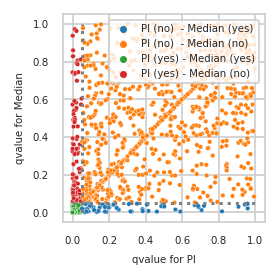

In [26]:
figsize = (2, 2)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- showing how many features were measured ("observed")

fontTools.subset - INFO     maxp pruned


fontTools.subset - INFO     cmap pruned


fontTools.subset - INFO     kern dropped


fontTools.subset - INFO     post pruned


fontTools.subset - INFO     FFTM dropped


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     Added gid0 to subset


fontTools.subset - INFO     Added first four glyphs to subset


fontTools.subset - INFO     Closing glyph list over 'MATH': 40 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'I', 'M', 'P', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 44, 48, 51, 68, 70, 71, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92]


fontTools.subset - INFO     Closed glyph list over 'MATH': 46 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'I', 'M', 'P', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 44, 48, 51, 68, 70, 71, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closing glyph list over 'GSUB': 46 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'I', 'M', 'P', 'a', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 44, 48, 51, 68, 70, 71, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511]


fontTools.subset - INFO     Closed glyph list over 'GSUB': 51 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'I', 'M', 'P', 'a', 'c', 'd', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 44, 48, 51, 68, 70, 71, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Closing glyph list over 'glyf': 51 glyphs before


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'I', 'M', 'P', 'a', 'c', 'd', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 44, 48, 51, 68, 70, 71, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Closed glyph list over 'glyf': 51 glyphs after


fontTools.subset - INFO     Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'I', 'M', 'P', 'a', 'c', 'd', 'e', 'eight', 'f', 'fi', 'five', 'fl', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'q', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'uni239B', 'uni239C', 'uni239D', 'uni239E', 'uni239F', 'uni23A0', 'uniFB00', 'uniFB03', 'uniFB04', 'v', 'y', 'zero']


fontTools.subset - INFO     Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 36, 38, 39, 44, 48, 51, 68, 70, 71, 72, 73, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 3506, 3507, 3508, 3509, 3510, 3511, 5038, 5039, 5040, 5041, 5042]


fontTools.subset - INFO     Retaining 51 glyphs


fontTools.subset - INFO     head subsetting not needed


fontTools.subset - INFO     hhea subsetting not needed


fontTools.subset - INFO     maxp subsetting not needed


fontTools.subset - INFO     OS/2 subsetting not needed


fontTools.subset - INFO     hmtx subsetted


fontTools.subset - INFO     cmap subsetted


fontTools.subset - INFO     fpgm subsetting not needed


fontTools.subset - INFO     prep subsetting not needed


fontTools.subset - INFO     cvt  subsetting not needed


fontTools.subset - INFO     loca subsetting not needed


fontTools.subset - INFO     post subsetted


fontTools.subset - INFO     gasp subsetting not needed


fontTools.subset - INFO     MATH subsetted


fontTools.subset - INFO     GDEF subsetted


fontTools.subset - INFO     GPOS subsetted


fontTools.subset - INFO     GSUB subsetted


fontTools.subset - INFO     name subsetting not needed


fontTools.subset - INFO     glyf subsetted


fontTools.subset - INFO     head pruned


fontTools.subset - INFO     OS/2 Unicode ranges pruned: [0]


fontTools.subset - INFO     OS/2 CodePage ranges pruned: [0]


fontTools.subset - INFO     glyf pruned


fontTools.subset - INFO     GDEF pruned


fontTools.subset - INFO     GPOS pruned


fontTools.subset - INFO     GSUB pruned


fontTools.subset - INFO     name pruned


vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_Median/diff_analysis_comparision_2_Median


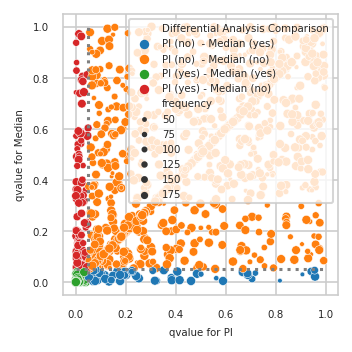

In [27]:
figsize = (2.5, 2.5)
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [28]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat)
                         )
    display(scores_model_only)
else:
    scores_model_only = None

In [29]:
if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

## DISEASES DB lookup

In [30]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [31]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out